In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv("heart.csv")     #get our data

In [4]:
dataset.shape        # our data has 1025 row and 14 column 

(1025, 14)

In [5]:
dataset.head(5)     # columns represent medical information of person



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# those are all the medical information of person:
1-age

2-sex

3-chest pain type (4 values)

4-resting blood pressure

5-serum cholestoral in mg/dl

6-fasting blood sugar > 120 mg/dl

7-resting electrocardiographic results (values 0,1,2)

8-maximum heart rate achieved

9-exercise induced angina

10-oldpeak = ST depression induced by exercise relative to rest

11-the slope of the peak exercise ST segment

12-number of major vessels (0-3) colored by flourosopy

In [14]:
dataset.info()
"""
 here all the colums and there are 1025 non_null values in each column
 non-null values means we don,t have missing values in each column
 all data types are int64 except oldpeak column is float64
 """

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


'\n here all the colums and there are 1025 non_null values in each column\n non-null values means we don,t have missing values in each column\n all data types are int64 except oldpeak column is float64\n '

In [12]:
# checking for missing value in each column
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Analysing data:

In [13]:
dataset.describe()
"""
the count represent the number of data in each column
the mean represent mean value of each column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# now Let's find how many people have heart disease and how many people doesn't have heart disease?


In [15]:
# the column of target determine if the person has heart disease or not 
# if target is 1 so person has heart disease
# if target is 0 so person doesn't have heart disease

dataset["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

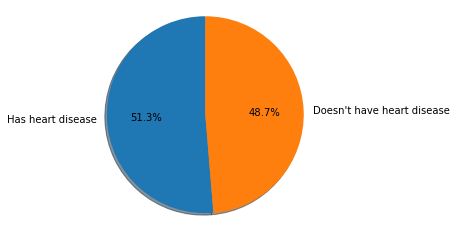

In [17]:
labels = "Has heart disease", "Doesn't have heart disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(dataset['target'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# we want to see What gender has the most heart disease? 

In [19]:
dataset['sex'].value_counts()
# 1-represent male 0-represent female

1    713
0    312
Name: sex, dtype: int64

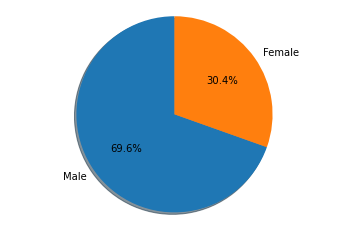

In [21]:
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(dataset['sex'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [27]:
#Let's find People of which sex has most heart disease?
pd.crosstab(dataset.target, dataset.sex)

#413 of males donot have heart disease while 300 have heart disease
# 226 of females have 226 heart disease while 86 donot have heart disease
# do females have high probability for exposed to heart disease ?



sex,0,1
target,,
0,86,413
1,226,300


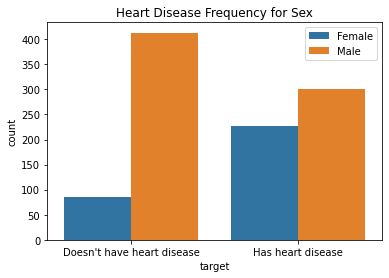

In [26]:
fig = sns.countplot(x = 'target', data = dataset, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

# Let's find people of which sex has which type of chest pain most?

In [28]:
#counting values for different chest pain
dataset.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

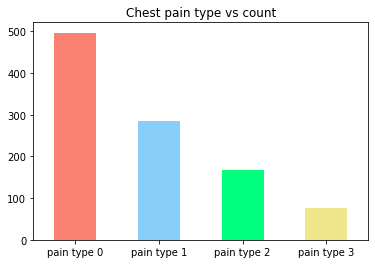

In [29]:
#plotting a bar chart
fig = dataset.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

In [35]:
pd.crosstab(dataset.sex, dataset.cp)
# Type of chest pain for sex

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


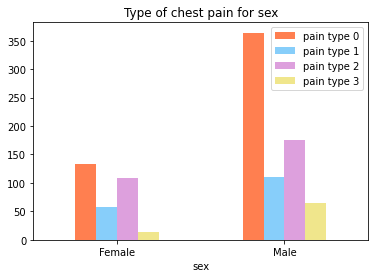

In [34]:
fig = pd.crosstab(dataset.sex, dataset.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

# Now let's find people with which chest pain are most pron to have heart disease?

In [39]:
pd.crosstab(dataset.cp, dataset.target)
#pain type 2 has more chance to have heart disease 


target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


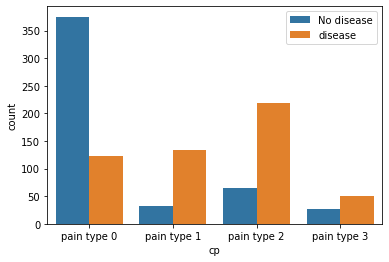

In [38]:
fig = sns.countplot(x = 'cp', data = dataset, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

# This section will show the distribution of numerical variables in histograms, boxplots, of age distrbution

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.249
Kurtosis: -0.526




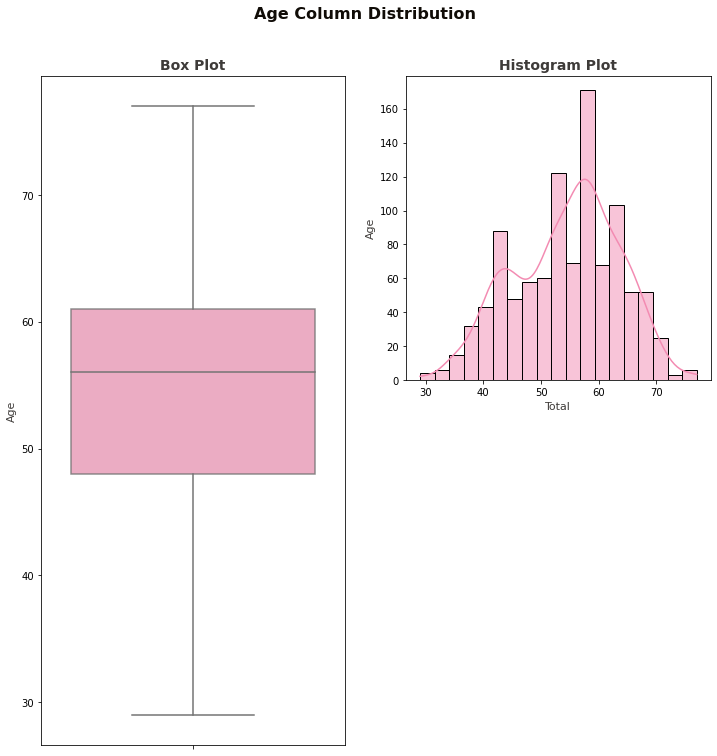

In [42]:
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
# --- Variable, Color & Plot Size ---
var = 'age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(dataset[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(dataset[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=dataset, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=dataset, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

# plot another distribution plot for Maximum heart rate

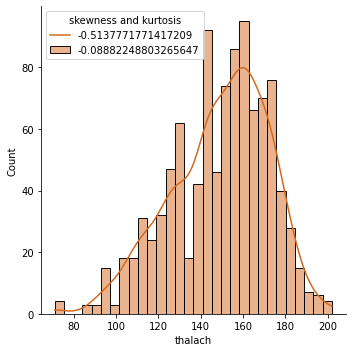

In [44]:
sns.displot(x = 'thalach', data = dataset, bins = 30, kde = True, color = 'chocolate')
skewness=str(dataset["thalach"].skew())
kurtosis=str(dataset["thalach"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

# observe Age vs Maximum heart rate when people have heart disease.

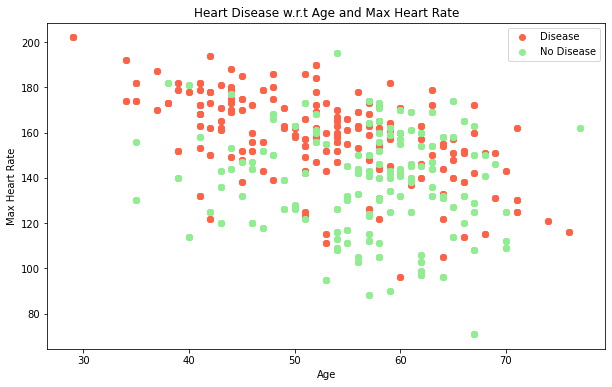

In [45]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(dataset.age[dataset.target==1], 
            dataset.thalach[dataset.target==1], 
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(dataset.age[dataset.target==0], 
            dataset.thalach[dataset.target==0], 
            c="lightgreen")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");


# distribution plot for number of people with heart disease vs max heart rate

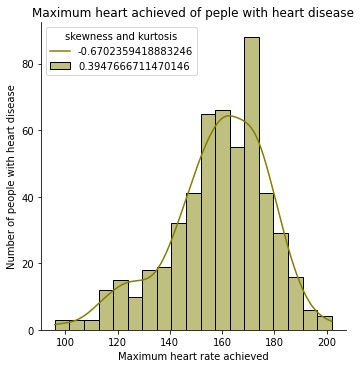

In [48]:
sns.displot(x = dataset.thalach[dataset.target==1], data = dataset, kde = True, color= 'olive')
skewness=str(dataset.thalach[dataset.target==1].skew())
kurtosis=str(dataset.thalach[dataset.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of peple with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

# Distribution plot for number of people without heart disease vs max heart rate

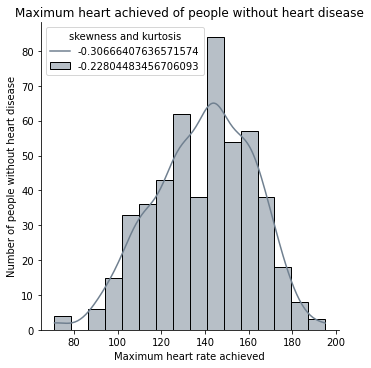

In [49]:
sns.displot(x = dataset.thalach[dataset.target==0], data = dataset, kde = True, color= 'slategray')
skewness=str(dataset.thalach[dataset.target==0].skew())
kurtosis=str(dataset.thalach[dataset.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

# Analysing the FBS feature

D:\abdelrhman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='target'>

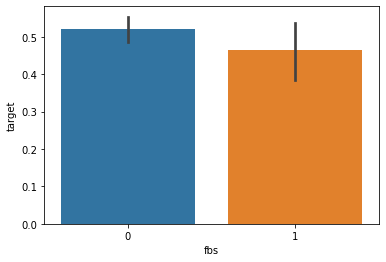

In [53]:
sns.barplot(dataset["fbs"],dataset["target"])

# Nothing extraordinary in FBS feature

# Analysing the restecg feature

D:\abdelrhman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='target'>

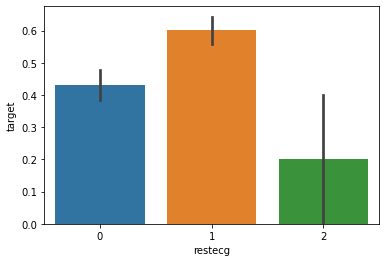

In [54]:
sns.barplot(dataset["restecg"],dataset["target"])

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

# Analysing the 'exang' feature

D:\abdelrhman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='target'>

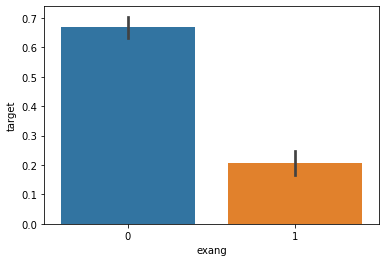

In [55]:
sns.barplot(dataset["exang"],dataset["target"])

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

Now let's find People of which sex has more exercise induced angina?

In [57]:
pd.crosstab(dataset.exang, dataset.sex)

sex,0,1
exang,,
0,238,442
1,74,271


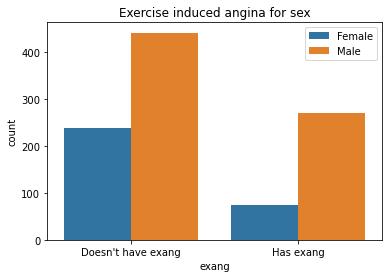

In [58]:
fig = sns.countplot(x = 'exang', data = dataset, hue = 'sex')
plt.title('Exercise induced angina for sex')
fig.set_xticklabels(labels=["Doesn't have exang", 'Has exang'], rotation=0)
plt.legend(['Female', 'Male']);

# Analysing the Slope feature

D:\abdelrhman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='target'>

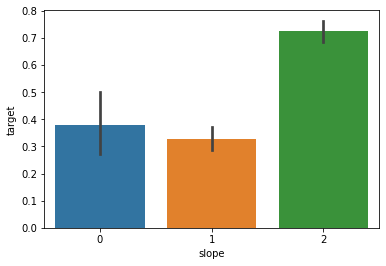

In [56]:
sns.barplot(dataset["slope"],dataset["target"])

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1

# Analysing the 'ca' feature

D:\abdelrhman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='count'>

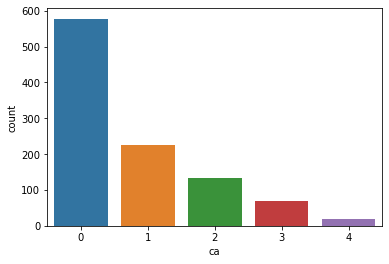

In [60]:
sns.countplot(dataset["ca"])

D:\abdelrhman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='target'>

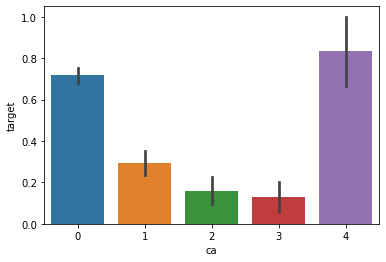

In [62]:
sns.barplot(dataset["ca"],dataset["target"])

ca=4 has astonishingly large number of heart patients

# Heart Disease Distribution based on Major Vessels Total 

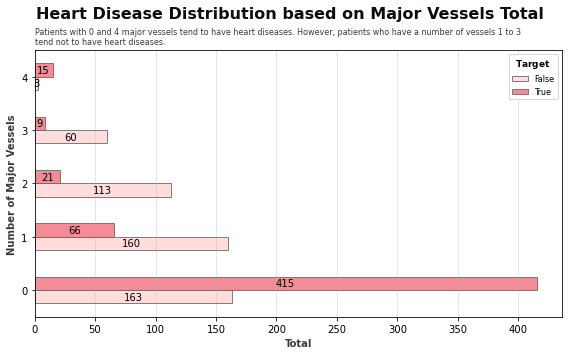

In [63]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(dataset.ca, dataset.target).plot(kind='barh', figsize=(8, 5), 
                                         color=color_mix[2:4],
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

 Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3 tend not to have heart diseases.

# Train Test split

In [6]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [65]:
X_train.shape

(820, 13)

In [66]:

X_test.shape

(205, 13)

# Model Fitting

In [8]:

from sklearn.metrics import accuracy_score

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, penalty='l2', solver='liblinear', C=0.05, random_state = 4)
lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [31]:
Y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 87.8 %


Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [11]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")


The accuracy score achieved using Naive Bayes is: 85.37 %


SVM

In [12]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [13]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


K Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [15]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [17]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


xgboost

In [21]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [22]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


In [34]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 87.8 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %


D:\abdelrhman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

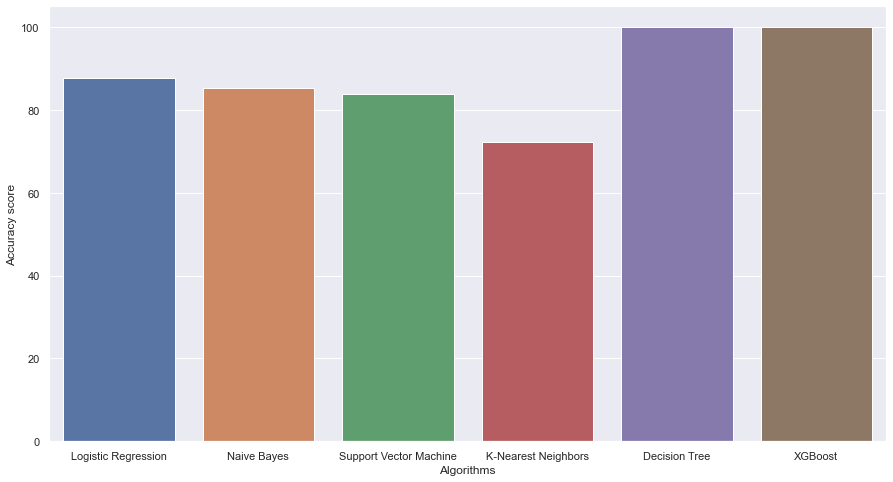

In [35]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)